In [33]:
import glob, os
import pandas as pd
import array
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [34]:
# Replace 'your_file.csv' with the actual file path or URL of your CSV file
file_path = 'C:/DEV/DATASETS/100STYLE_Preprocessed/seq_in_3.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,seq_id,frame,root_pos_x_0,root_pos_y_0,root_fwd_x_0,root_fwd_y_0,root_vel_x_0,root_vel_y_0,root_speed_0,root_pos_x_1,...,jpos_x_EndSite_LeftToe,jpos_y_EndSite_LeftToe,jpos_z_EndSite_LeftToe,jrot_x_EndSite_LeftToe,jrot_y_EndSite_LeftToe,jrot_z_EndSite_LeftToe,jrot_W_EndSite_LeftToe,jvel_x_EndSite_LeftToe,jvel_y_EndSite_LeftToe,jvel_z_EndSite_LeftToe
0,3,6,-0.697160,0.737982,-0.021435,0.999770,-40.920200,-23.894700,83.619300,-0.618065,...,30.7106,-95.4941,-12.0499,0.121861,-0.970985,-0.004789,0.205709,0.073242,0.123363,0.104013
1,3,7,-0.804032,0.693457,-0.023329,0.999728,0.047811,-0.079154,0.093450,-0.724225,...,30.8838,-95.2832,-11.9058,0.126033,-0.971087,-0.009987,0.202499,0.056683,0.149623,0.096279
2,3,8,-0.926347,0.635801,-0.025292,0.999680,0.048237,-0.078972,0.093450,-0.825668,...,31.0220,-95.0217,-11.7814,0.132173,-0.971000,-0.015471,0.198618,0.074732,0.172291,0.087224
3,3,9,-1.032870,0.575147,-0.026172,0.999657,0.061630,-0.072978,0.098393,-0.903352,...,31.1391,-94.7489,-11.8379,0.138179,-0.971684,-0.020805,0.190538,0.185358,0.175702,0.052266
4,3,10,-1.113310,0.513255,-0.025321,0.999679,0.080552,-0.065302,0.112384,-0.963257,...,31.2457,-94.4537,-12.1099,0.145181,-0.973100,-0.025955,0.176991,0.312258,0.185661,0.017540


## Collect all frames

In [35]:
os.chdir("C:/DEV/DATASETS/100STYLE_Preprocessed/")

dataframes = []

for file in glob.glob("seq_in_*.csv"):
    print(file)
    df = pd.read_csv(file)
    dataframes.append(df)

df_X = pd.concat(dataframes)

seq_in_3.csv


In [36]:
dataframes_out = []
for file in glob.glob("seq_out_*.csv"):
    print(file)
    df = pd.read_csv(file)
    dataframes_out.append(df)

df_Y = pd.concat(dataframes_out)

seq_out_3.csv


In [37]:
df_X

,seq_id,frame,root_pos_x_0,root_pos_y_0,root_fwd_x_0,root_fwd_y_0,root_vel_x_0,root_vel_y_0,root_speed_0,root_pos_x_1,...,jpos_x_EndSite_LeftToe,jpos_y_EndSite_LeftToe,jpos_z_EndSite_LeftToe,jrot_x_EndSite_LeftToe,jrot_y_EndSite_LeftToe,jrot_z_EndSite_LeftToe,jrot_W_EndSite_LeftToe,jvel_x_EndSite_LeftToe,jvel_y_EndSite_LeftToe,jvel_z_EndSite_LeftToe
0,3,6,-0.697160,0.737982,-0.021435,0.999770,-40.920200,-23.894700,83.619300,-0.618065,...,30.7106,-95.4941,-12.0499,0.121861,-0.970985,-0.004789,0.205709,0.073242,0.123363,0.104013
1,3,7,-0.804032,0.693457,-0.023329,0.999728,0.047811,-0.079154,0.093450,-0.724225,...,30.8838,-95.2832,-11.9058,0.126033,-0.971087,-0.009987,0.202499,0.056683,0.149623,0.096279
2,3,8,-0.926347,0.635801,-0.025292,0.999680,0.048237,-0.078972,0.093450,-0.825668,...,31.0220,-95.0217,-11.7814,0.132173,-0.971000,-0.015471,0.198618,0.074732,0.172291,0.087224
3,3,9,-1.032870,0.575147,-0.026172,0.999657,0.061630,-0.072978,0.098393,-0.903352,...,31.1391,-94.7489,-11.8379,0.138179,-0.971684,-0.020805,0.190538,0.185358,0.175702,0.052266
4,3,10,-1.113310,0.513255,-0.025321,0.999679,0.080552,-0.065302,0.112384,-0.963257,...,31.2457,-94.4537,-12.1099,0.145181,-0.973100,-0.025955,0.176991,0.312258,0.185661,0.017540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,3,4930,0.075419,-0.030633,-0.001524,0.999999,-0.009332,0.004127,0.010313,0.060446,...,17.3474,-96.2656,13.3480,0.039071,-0.347512,0.008866,0.936819,0.000151,-0.000043,0.000831
4925,3,4931,0.069910,-0.030804,-0.001411,0.999999,-0.008958,0.004100,0.010007,0.055879,...,17.3567,-96.2698,13.3411,0.038885,-0.347644,0.008888,0.936778,0.000174,-0.000148,0.000874
4926,3,4932,0.064522,-0.032354,-0.001225,0.999999,-0.008394,0.003651,0.009366,0.051577,...,17.3648,-96.2738,13.3335,0.038688,-0.347757,0.008916,0.936744,0.000158,-0.000123,0.000828
4927,3,4933,0.059535,-0.036306,-0.000895,1.000000,-0.007736,0.002737,0.008525,0.047534,...,17.3720,-96.2780,13.3254,0.038474,-0.347826,0.008946,0.936726,0.000116,-0.000202,0.000720


In [41]:
df_X.filter(like='jvel').columns

Index(['jvel_x_Hips', 'jvel_y_Hips', 'jvel_z_Hips', 'jvel_x_Chest',
       'jvel_y_Chest', 'jvel_z_Chest', 'jvel_x_Chest2', 'jvel_y_Chest2',
       'jvel_z_Chest2', 'jvel_x_Chest3', 'jvel_y_Chest3', 'jvel_z_Chest3',
       'jvel_x_Chest4', 'jvel_y_Chest4', 'jvel_z_Chest4', 'jvel_x_Neck',
       'jvel_y_Neck', 'jvel_z_Neck', 'jvel_x_Head', 'jvel_y_Head',
       'jvel_z_Head', 'jvel_x_EndSite_Head', 'jvel_y_EndSite_Head',
       'jvel_z_EndSite_Head', 'jvel_x_RightCollar', 'jvel_y_RightCollar',
       'jvel_z_RightCollar', 'jvel_x_RightShoulder', 'jvel_y_RightShoulder',
       'jvel_z_RightShoulder', 'jvel_x_RightElbow', 'jvel_y_RightElbow',
       'jvel_z_RightElbow', 'jvel_x_RightWrist', 'jvel_y_RightWrist',
       'jvel_z_RightWrist', 'jvel_x_EndSite_RightWrist',
       'jvel_y_EndSite_RightWrist', 'jvel_z_EndSite_RightWrist',
       'jvel_x_LeftCollar', 'jvel_y_LeftCollar', 'jvel_z_LeftCollar',
       'jvel_x_LeftShoulder', 'jvel_y_LeftShoulder', 'jvel_z_LeftShoulder',
       'jvel_x

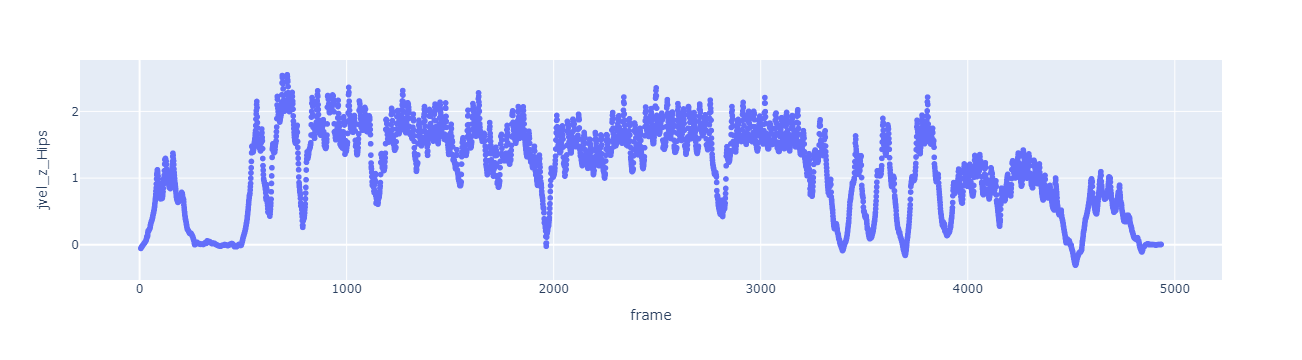

In [54]:
fig = px.scatter(df_X, x= "frame", y="jvel_z_Hips")
fig.show()

In [38]:
df_Y

seq_id  \
3 6     0.182328 -0.090687 -0.004658 0 0  0.000000e+00 1  0.111737 -0.046549  0.198833 -0.077980  0.004728 0.999983  0.121205 -0.040177  0.403188 -0.148575  0.008833 0.999939  0.124438 -0.036105  0.610929 -0.213258  0.011950 0.999885  0.126453 -0.032704  0.824188 -0.270555  0.014436 0.999827  0.129685 -0.028636  1.038800 -0.320540   
  7     0.198833 -0.077980 -0.004721 0 0 -1.788140e-07 1  0.121522 -0.039729  0.204689 -0.069632  0.004094 0.999987  0.124725 -0.035632  0.412731 -0.133332  0.007201 0.999957  0.126719 -0.032217  0.626248 -0.189612  0.009678 0.999919  0.129920 -0.028124  0.841081 -0.238567  0.011909 0.999873  0.130549 -0.024334  1.053030 -0.281076   
  8     0.204689 -0.069632 -0.004085 0 0  0.000000e+00 1  0.125002 -0.035149  0.208296 -0.062843  0.003099 0.999992  0.126974 -0.031719  0.422030 -0.118238  0.005570 0.999972  0.130146 -0.027602  0.637046 -0.166298  0.007794 0.999942  0.130743 -0.023795  0.849143 -0.207919  0.009749 0.999904  0.128833 -0.020461  1.062520 -0.242206   
  9     0.208296 -0.062843 -0.003069 0 0  0.000000e+00 1  0.127187 -0.031290  0.213895 -0.054721  0.002465 0.999994  0.130334 -0.027151  0.429045 -0.102098  0.004684 0.999978  0.130905 -0.023330  0.641253 -0.143043  0.006634 0.999953  0.128971 -0.019994  0.854719 -0.176645  0.008332 0.999921  0.129541 -0.016177  1.077890 -0.200307   
  10    0.213895 -0.054721 -0.002466 0 0 -1.192090e-07 1  0.130475 -0.026815  0.215255 -0.046831  0.002215 0.999995  0.131025 -0.022983  0.427550 -0.087235  0.004161 0.999980  0.129074 -0.019644  0.641083 -0.120288  0.005856 0.999958  0.129624 -0.015815  0.864291 -0.143371  0.007745 0.999928  0.135104 -0.010822  1.098630 -0.154566   
...                                                                                                                                                                                                                                                                                                                                      ...   
  4930 -0.009459  0.006807  0.000000 0 0  0.000000e+00 1 -0.005645  0.004244 -0.008641  0.007404  0.000080 1.000000 -0.005151  0.004604 -0.016601  0.015650  0.000029 1.000000 -0.004745  0.005110 -0.023741  0.024492 -0.000102 1.000000 -0.004253  0.005466 -0.029710  0.032912 -0.000209 0.999999 -0.003546  0.005223 -0.034802  0.040954   
  4931 -0.008641  0.007404  0.000000 0 0 -2.980230e-08 1 -0.005152  0.004602 -0.007961  0.008246 -0.000051 1.000000 -0.004745  0.005109 -0.015101  0.017087 -0.000182 1.000000 -0.004254  0.005465 -0.021071  0.025507 -0.000289 0.999999 -0.003547  0.005222 -0.026163  0.033549 -0.000326 0.999999 -0.003024  0.004999 -0.030092  0.041167   
  4932 -0.007961  0.008246  0.000000 0 0 -2.980230e-08 1 -0.004746  0.005108 -0.007140  0.008841 -0.000132 1.000000 -0.004255  0.005464 -0.013109  0.017262 -0.000238 1.000000 -0.003547  0.005222 -0.018201  0.025304 -0.000275 0.999999 -0.003024  0.004998 -0.022129  0.032923 -0.000286 0.999999 -0.002320  0.004751 -0.023622  0.038962   
  4933 -0.007140  0.008841  0.000000 0 0 -5.960460e-08 1 -0.004255  0.005463 -0.005968  0.008421 -0.000106 1.000000 -0.003547  0.005221 -0.011059  0.016464 -0.000143 1.000000 -0.003024  0.004997 -0.014986  0.024084 -0.000155 0.999999 -0.002320  0.004751 -0.016478  0.030124 -0.000167 0.999999 -0.000855  0.003843 -0.014314  0.033669   
  4934 -0.005968  0.008421  0.000000 0 0 -1.490120e-08 1 -0.003547  0.005221 -0.005090  0.008043 -0.000037 1.000000 -0.003024  0.004997 -0.009016  0.015664 -0.000048 1.000000 -0.002319  0.004750 -0.010508  0.021704 -0.000060 0.999999 -0.000855  0.003842 -0.008343  0.025249 -0.000082 0.999998  0.001352  0.002406 -0.003744  0.027215   

                                                                                                                                                                                                                                                                                                     

In [39]:
means = df_X.mean()
std_devs = df_X.std()

# Display the results
for col in df_X.columns:
    print(f"Column: {col}")
    print(f"Mean: {means[col]}")
    print(f"Standard Deviation: {std_devs[col]}\n")
    break #remove to print full

Column: seq_id
Mean: 3.0
Standard Deviation: 0.0



In [40]:
def ReadBinary(filePath, sampleCount, featureCount):
    bytesPerLine = featureCount*4
    data = []
    with open(filePath, "rb") as f:
        for i in np.arange(sampleCount):
            f.seek(i*bytesPerLine)
            bytes = f.read(bytesPerLine)
            data.append(np.float32(array.array('f',bytes)))
    return np.concatenate(data).reshape(sampleCount, -1)

In [32]:
ReadBinary("joint_velocity.bin", 10, 28*3)

array([[-4.99383430e+01,  5.89328995e+01,  3.20197105e+01,
        -5.18550529e+01,  6.64619141e+01,  3.18077564e+01,
        -5.21509972e+01,  7.25780869e+01,  3.25506287e+01,
        -5.19638290e+01,  7.80535355e+01,  3.35680008e+01,
        -5.12998657e+01,  8.34155197e+01,  3.49314079e+01,
        -4.98460922e+01,  9.09113770e+01,  3.72429657e+01,
        -4.71937637e+01,  9.47076187e+01,  3.99731483e+01,
        -4.71937637e+01,  9.47076187e+01,  3.99731483e+01,
        -5.11207275e+01,  8.71973114e+01,  3.79852295e+01,
        -5.29621735e+01,  8.34492569e+01,  4.64906197e+01,
        -4.86248856e+01,  6.52980423e+01,  4.75294533e+01,
        -4.50695496e+01,  5.07123642e+01,  5.05912094e+01,
        -4.50695496e+01,  5.07123642e+01,  5.05912094e+01,
        -4.98495750e+01,  8.80352707e+01,  3.44684372e+01,
        -4.61319466e+01,  8.78460846e+01,  2.57550011e+01,
        -4.84194069e+01,  7.02681885e+01,  1.98268833e+01,
        -4.56318588e+01,  5.53830719e+01,  1.74988441e+0